In [8]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from itertools import product

In [9]:
# Cell 2: City class definition
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xCor = abs(self.x - city.x)
        yCor = abs(self.y - city.y)
        dist = np.sqrt(xCor ** 2 + yCor ** 2)
        return dist

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [10]:
# Cell 3: Creating distance matrix
def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return distance_matrix

citylist = []
for i in range(0, 25):
    citylist.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

print("Cities: ", citylist)

distance_matrix = create_distance_matrix([[city.x, city.y] for city in citylist])

Cities:  [(168,54), (183,156), (147,116), (63,135), (2,175), (105,49), (176,191), (0,103), (198,39), (31,33), (133,150), (1,54), (90,29), (150,2), (0,20), (54,22), (121,50), (36,176), (116,69), (163,111), (49,81), (20,63), (2,196), (65,191), (62,7)]


In [11]:
# Cell 4: PSO parameters
num_particles = 100
num_iterations = 2000
inertia_weight = 0.9
cognitive_coeff = 1.5
social_coeff = 1.5

In [12]:
# Cell 5: Helper functions
def create_initial_population(num_particles, num_nodes):
    population = []
    for _ in range(num_particles):
        particle = np.random.permutation(num_nodes)
        population.append(particle)
    return population

def calculate_fitness(particle, distance_matrix):
    fitness = 0
    for i in range(len(particle) - 1):
        fitness += distance_matrix[particle[i], particle[i + 1]]
    fitness += distance_matrix[particle[-1], particle[0]]
    return fitness

def update_velocity(particle, velocity, best_personal_position, best_global_position, inertia_weight, cognitive_coeff, social_coeff):
    new_velocity = inertia_weight * velocity
    cognitive_component = cognitive_coeff * np.random.random() * (best_personal_position - particle)
    social_component = social_coeff * np.random.random() * (best_global_position - particle)
    new_velocity += cognitive_component + social_component
    return new_velocity

def apply_velocity(particle, velocity):
    new_particle = particle + velocity
    new_particle = np.mod(new_particle, len(particle))
    new_particle = np.argsort(new_particle)
    return new_particle

In [13]:
# Cell 6: PSO algorithm implementation
def pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff):
    num_nodes = distance_matrix.shape[0]
    population = create_initial_population(num_particles, num_nodes)
    velocities = [np.zeros(num_nodes) for _ in range(num_particles)]
    
    best_personal_positions = population.copy()
    best_personal_fitnesses = [calculate_fitness(p, distance_matrix) for p in population]
    best_global_position = best_personal_positions[np.argmin(best_personal_fitnesses)]
    best_global_fitness = min(best_personal_fitnesses)
    
    for iteration in range(num_iterations):
        for i in range(num_particles):
            fitness = calculate_fitness(population[i], distance_matrix)
            if fitness < best_personal_fitnesses[i]:
                best_personal_fitnesses[i] = fitness
                best_personal_positions[i] = population[i]
            if fitness < best_global_fitness:
                best_global_fitness = fitness
                best_global_position = population[i]
        
        for i in range(num_particles):
            velocities[i] = update_velocity(population[i], velocities[i], best_personal_positions[i], best_global_position, inertia_weight, cognitive_coeff, social_coeff)
            population[i] = apply_velocity(population[i], velocities[i])
        
        print(f"Iteration {iteration + 1}/{num_iterations}, Best path length: {best_global_fitness}")
    
    return best_global_position, best_global_fitness

# Running the PSO algorithm
best_path, best_path_length = pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff)
print(f"Best path found: {best_path} with length {best_path_length}")

Iteration 1/2000, Best path length: 2380.3282489487
Iteration 2/2000, Best path length: 2380.3282489487
Iteration 3/2000, Best path length: 2380.3282489487
Iteration 4/2000, Best path length: 2380.3282489487
Iteration 5/2000, Best path length: 2380.3282489487
Iteration 6/2000, Best path length: 2380.3282489487
Iteration 7/2000, Best path length: 2022.4367209514814
Iteration 8/2000, Best path length: 2022.4367209514814
Iteration 9/2000, Best path length: 2022.4367209514814
Iteration 10/2000, Best path length: 2022.4367209514814
Iteration 11/2000, Best path length: 2022.4367209514814
Iteration 12/2000, Best path length: 2022.4367209514814
Iteration 13/2000, Best path length: 2022.4367209514814
Iteration 14/2000, Best path length: 2022.4367209514814
Iteration 15/2000, Best path length: 2022.4367209514814
Iteration 16/2000, Best path length: 2022.4367209514814
Iteration 17/2000, Best path length: 2022.4367209514814
Iteration 18/2000, Best path length: 2022.4367209514814
Iteration 19/2000, 

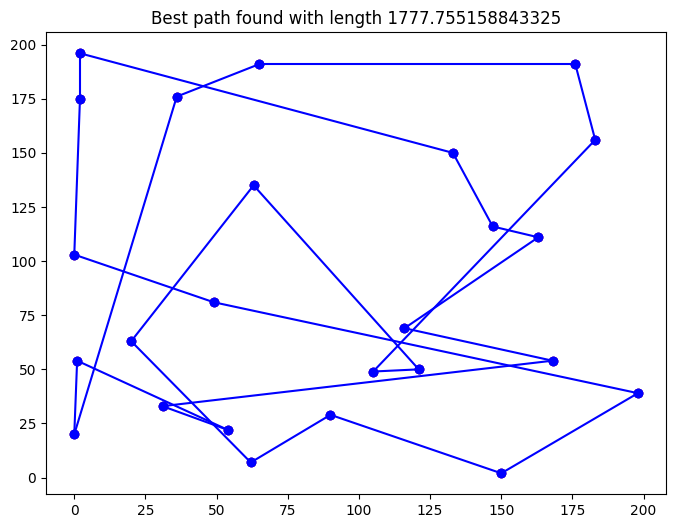

In [14]:
# Cell 7: Plotting the result
def plot_tsp_path(citylist, path):
    coordinates = [(city.x, city.y) for city in citylist]
    plt.figure(figsize=(8, 6))
    for i in range(len(path)):
        start = coordinates[path[i]]
        end = coordinates[path[(i + 1) % len(path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.scatter(*zip(*coordinates), color='red')
    plt.title(f"Best path found with length {best_path_length}")
    plt.show()

plot_tsp_path(citylist, best_path)